# Modelo basado en capas convolucionales para clasificación de dígitos

 Modelo preentrenado (formato .h5):

conda create -n mnist-cnn python=3.10 -y
conda activate mnist-cnn
conda install -c conda-forge notebook matplotlib pillow numpy tensorflow -y
pip install requests
pip install keras==2.13.1 tensorflow==2.13.0

In [7]:
import requests

url = "https://huggingface.co/spaces/ayaanzaveri/mnist/resolve/main/mnist-model.h5"
r = requests.get(url)
with open("mnist_model.h5", "wb") as f:
    f.write(r.content)

print("Modelo guardado correctamente.")

Modelo guardado correctamente.


Usar el modelo descargado

In [8]:
from tensorflow.keras.models import load_model
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Cargar datos de prueba
(_, _), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Cargar el modelo preentrenado
model = load_model("mnist_model.h5")

# Carga el modelo con las metricas correctas

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

# Evaluar el modelo
loss, accuracy = model.evaluate(x_test, y_test)
print("Precisión en el conjunto de prueba:", accuracy)

AttributeError: module 'optree' has no attribute 'tree_is_leaf'

Realizar una predicción

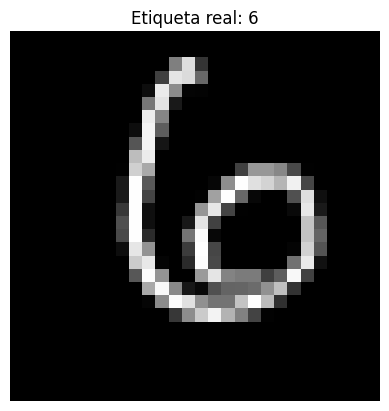

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
Predicción del modelo: 6


In [ ]:

idx = 100  # Cambia este índice para probar otras imágenes
img = x_test[idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(f"Etiqueta real: {y_test[idx]}")
plt.axis('off')
plt.show()

prediction = model.predict(np.expand_dims(img, axis=0))
print("Predicción del modelo:", np.argmax(prediction))

# Para hacer

1. Mostrar los valores y visualizar al menos 10 kernels del modelo pre-entrenado
2. Mostrar las salidas obtenidas al aplicar la convolución de una imagen con los kernels del ejercicio 1.
3. Calcular las predicciones de al menos 10 imágenes propias (adjuntar evidencia del proceso de adquisición de imágenes). Aplicar y explicar el tratamiento de imágenes necesario para adecuar los datos de entrada al modelo.
4. Repetir el ejercicio 2 con al menos una de las imágenes del ejercicio 3.

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 692,682 (2.64 MB)

 Trainable params: 691,786 (2.64 MB)

 Non-trainable params: 896 (3.50 KB)


Capa 1 - Primer kernel (valores):
[[-0.12700336  0.06122914  0.18749826]
 [ 0.00937727  0.06842199 -0.15611908]
 [ 0.07726777  0.1055401  -0.07614024]]


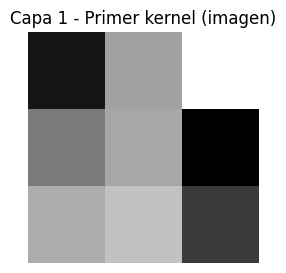

Capa 1 - Último kernel (valores):
[[ 0.11381719 -0.22699758 -0.16653965]
 [ 0.18439128 -0.0025469  -0.08994944]
 [ 0.21870695  0.12511031 -0.06553458]]


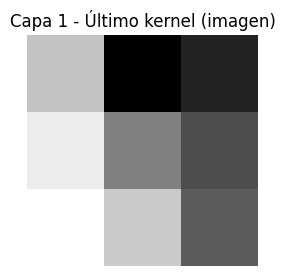


Capa 2 - Primer kernel (valores):
[[ 0.14588462  0.0402976  -0.10355145]
 [-0.08921629 -0.07951704 -0.00754875]
 [-0.00111887 -0.02794225  0.07225388]]


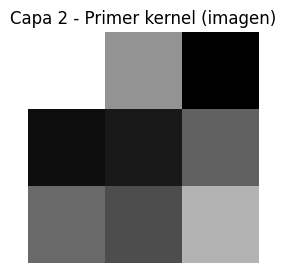

Capa 2 - Último kernel (valores):
[[ 0.02181754 -0.07459527 -0.00539613]
 [ 0.00272173 -0.08792271 -0.04937008]
 [-0.08484989  0.02687534  0.07587203]]


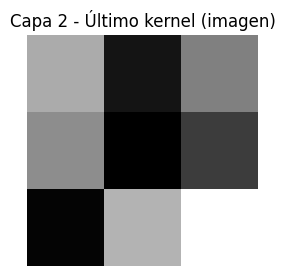


Capa 3 - Primer kernel (valores):
[[-0.17652047 -0.03202177  0.05169495]
 [-0.20717472  0.06647174  0.1379608 ]
 [-0.23509468  0.0295181   0.105363  ]]


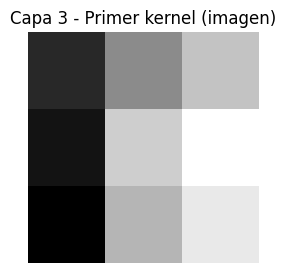

Capa 3 - Último kernel (valores):
[[ 0.06488708 -0.00893082  0.05234843]
 [-0.06433626  0.06349277  0.1834091 ]
 [ 0.04460534  0.05011911  0.06099852]]


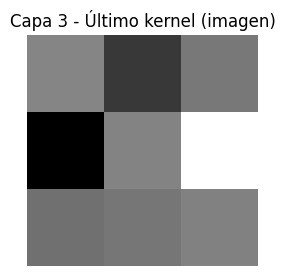


Capa 4 - Primer kernel (valores):
[[-0.06314228 -0.1323214  -0.00825861]
 [-0.11735255 -0.19713691 -0.00533731]
 [ 0.12179384 -0.11537623 -0.1376578 ]]


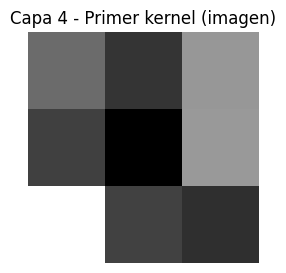

Capa 4 - Último kernel (valores):
[[-0.00869451 -0.04847107 -0.05608987]
 [ 0.10091408  0.19113673  0.1435579 ]
 [-0.10909037  0.04223897  0.14011225]]


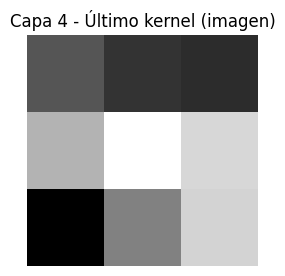


Capa 5 - Primer kernel (valores):
[[-0.06000004  0.14036366  0.14732313]
 [ 0.12144022  0.1581108   0.02698547]
 [-0.03098069 -0.01717623 -0.00708854]]


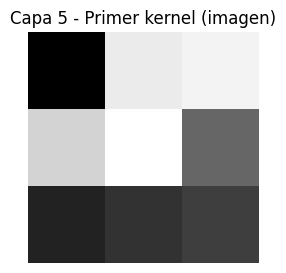

Capa 5 - Último kernel (valores):
[[ 0.03146084 -0.09170184  0.04477895]
 [-0.06161929  0.11334665  0.05459785]
 [ 0.03340673 -0.02337649  0.13003601]]


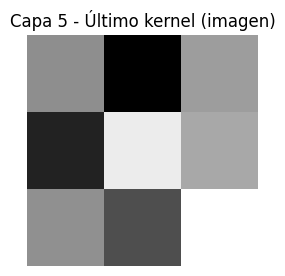

In [ ]:
# Selecciona 3 imágenes del set de prueba
idxs = [0, 1, 2]
imgs = [x_test[i].reshape(1, 28, 28, 1) for i in idxs]

# Obtiene las capas convolucionales del modelo
conv_layers = [layer for layer in model.layers if 'conv' in layer.name]

# BLOQUE 1: Visualiza los kernels (valores numéricos y como imagen)
for i, conv in enumerate(conv_layers):
    kernels, _ = conv.get_weights()
    kernel_first = kernels[:, :, 0, 0]
    kernel_last = kernels[:, :, 0, -1]

    print(f"\nCapa {i+1} - Primer kernel (valores):\n{kernel_first}")
    plt.figure(figsize=(3, 3))
    plt.imshow(kernel_first, cmap='gray')
    plt.title(f'Capa {i+1} - Primer kernel (imagen)')
    plt.axis('off')
    plt.show()

    print(f"Capa {i+1} - Último kernel (valores):\n{kernel_last}")
    plt.figure(figsize=(3, 3))
    plt.imshow(kernel_last, cmap='gray')
    plt.title(f'Capa {i+1} - Último kernel (imagen)')
    plt.axis('off')
    plt.show()


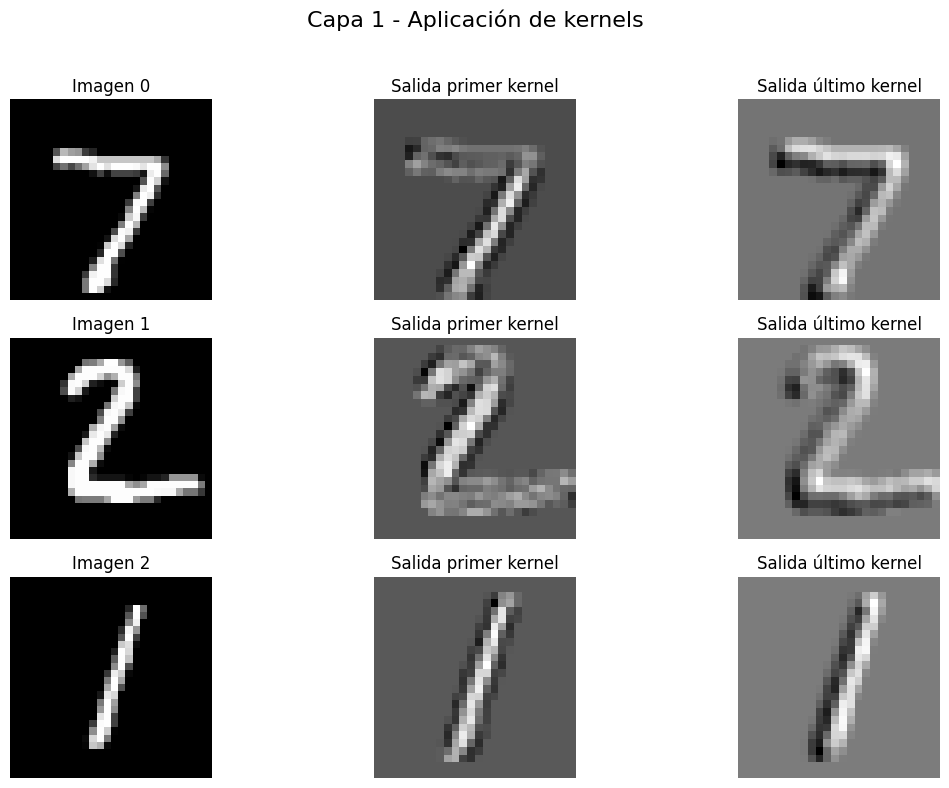

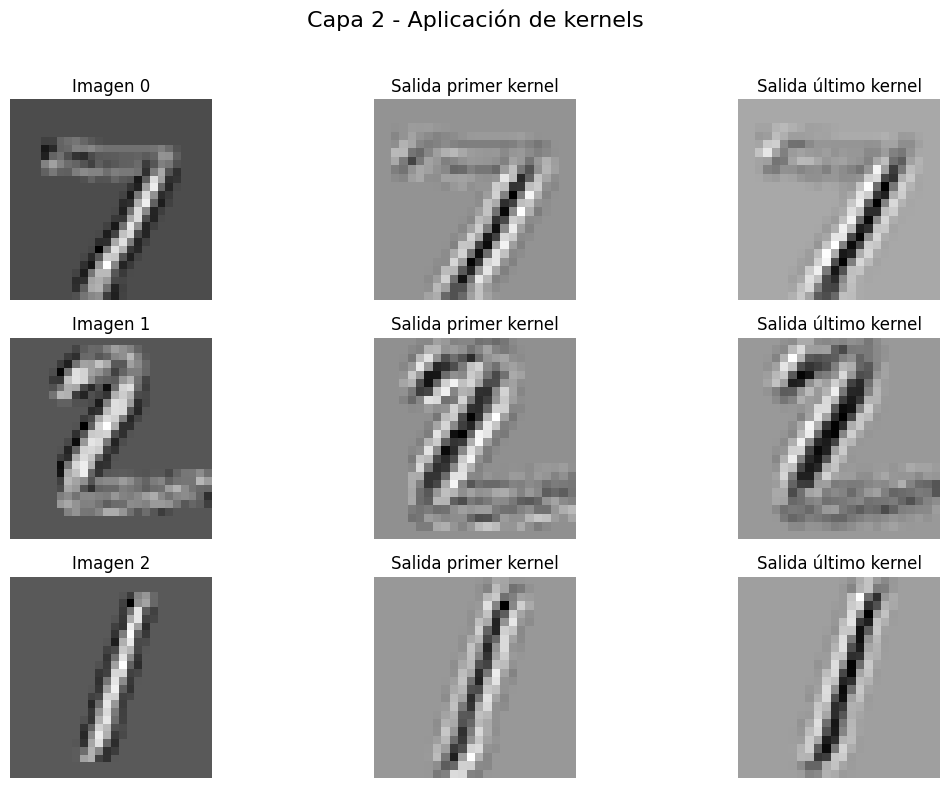

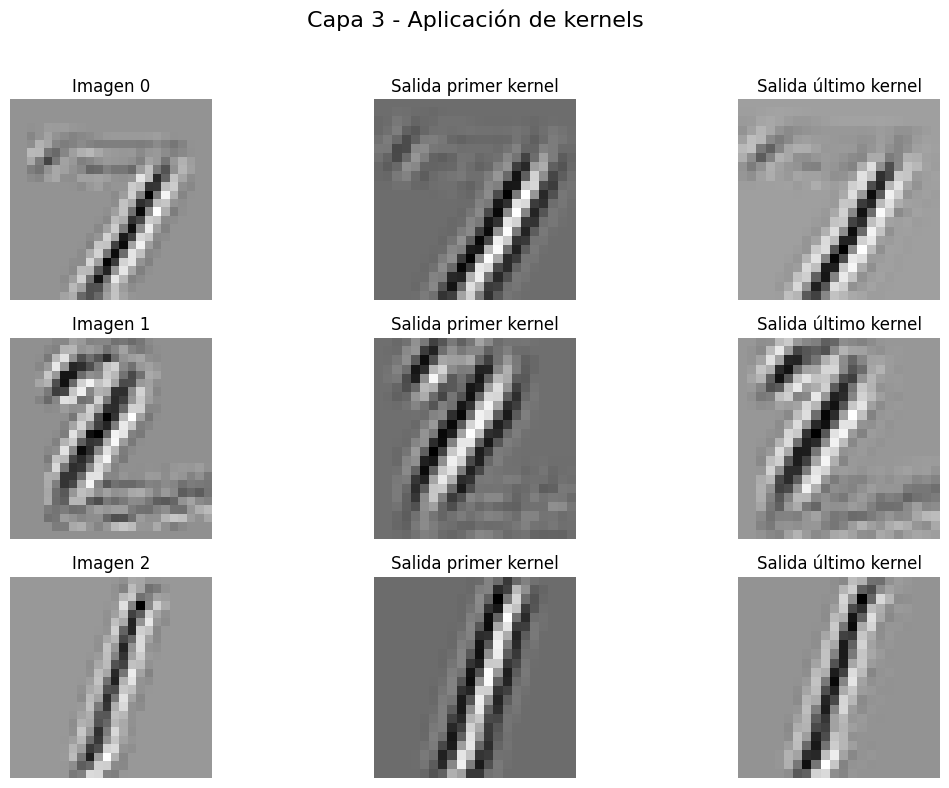

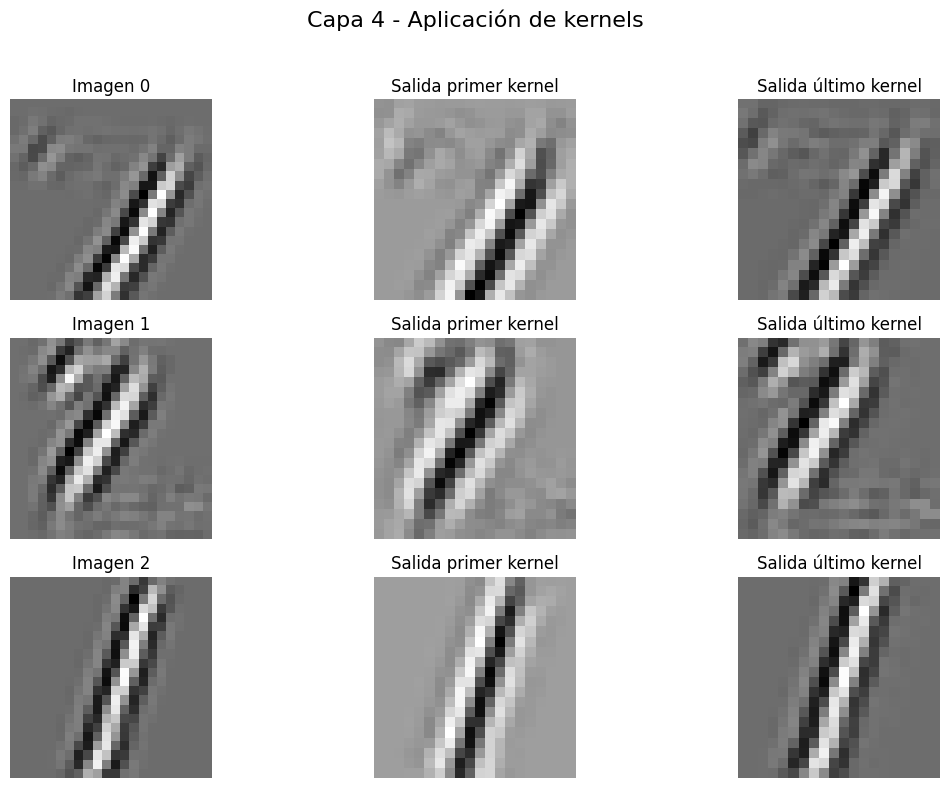

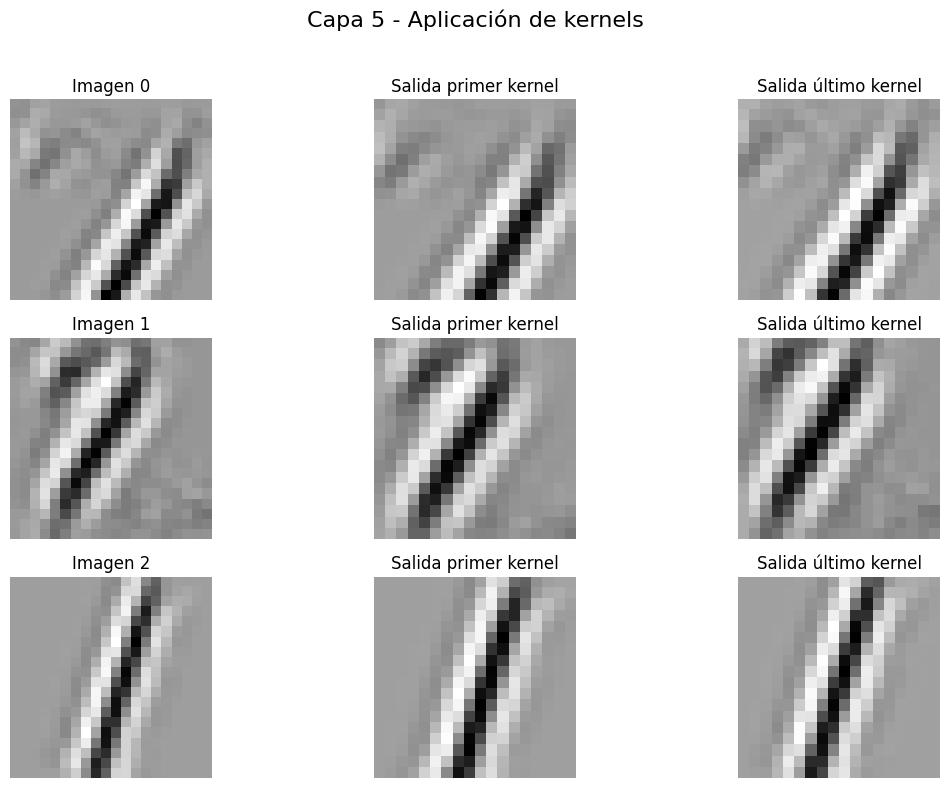

In [ ]:
imgs_aplicar = [x_test[i].reshape(1, 28, 28, 1) for i in idxs]  # reinicia imgs para aplicar kernels
for i, conv in enumerate(conv_layers):
    kernels, _ = conv.get_weights()
    kernel_first = kernels[:, :, 0, 0]
    kernel_first_tf = kernel_first[:, :, np.newaxis, np.newaxis]
    kernel_last = kernels[:, :, 0, -1]
    kernel_last_tf = kernel_last[:, :, np.newaxis, np.newaxis]

    fig, axes = plt.subplots(3, 3, figsize=(12, 8))
    fig.suptitle(f'Capa {i+1} - Aplicación de kernels', fontsize=16)

    for j, img in enumerate(imgs_aplicar):
        out_first = tf.nn.conv2d(img, kernel_first_tf, strides=1, padding='VALID')
        out_last = tf.nn.conv2d(img, kernel_last_tf, strides=1, padding='VALID')

        axes[j, 0].imshow(img[0, :, :, 0], cmap='gray')
        axes[j, 0].set_title(f'Imagen {idxs[j]}')
        axes[j, 0].axis('off')

        axes[j, 1].imshow(out_first[0, :, :, 0], cmap='gray')
        axes[j, 1].set_title('Salida primer kernel')
        axes[j, 1].axis('off')

        axes[j, 2].imshow(out_last[0, :, :, 0], cmap='gray')
        axes[j, 2].set_title('Salida último kernel')
        axes[j, 2].axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # La salida del primer kernel se usa como entrada para la siguiente capa
    imgs_aplicar = [tf.nn.conv2d(img, kernel_first_tf, strides=1, padding='VALID') for img in imgs_aplicar]

In [ ]:
import os
import random
from PIL import Image

# Ruta a tu carpeta de imágenes propias
carpeta_imgs = "numeros"
nombres_imgs = [f"{i}.jpg" for i in range(10)]  # Ajusta si tienes más o menos imágenes

# Cargar y preprocesar imágenes propias
imgs_propias = []
for nombre in nombres_imgs:
    ruta = os.path.join(carpeta_imgs, nombre)
    img = Image.open(ruta).convert("L").resize((28, 28))
    arr = np.array(img).astype("float32") / 255.0
    arr = 1.0 - arr  # Invertir colores: fondo negro, dígito blanco
    arr = arr.reshape(1, 28, 28, 1)
    imgs_propias.append(arr)

# Mostrar número real y predicción para cada imagen propia
for i, arr in enumerate(imgs_propias):
    pred = model.predict(arr)
    plt.imshow(arr[0, :, :, 0], cmap='gray')
    plt.title(f"Real: {i} | Predicción: {np.argmax(pred)}")
    plt.axis('off')
    plt.show()

# Elegir 5 imágenes aleatorias de las 10
idxs_random = random.sample(range(10), 5)
imgs_aplicar = [imgs_propias[i] for i in idxs_random]
nombres_random = [nombres_imgs[i] for i in idxs_random]

for i, conv in enumerate(conv_layers):
    kernels, _ = conv.get_weights()
    kernel_first = kernels[:, :, 0, 0]
    kernel_first_tf = kernel_first[:, :, np.newaxis, np.newaxis]
    kernel_last = kernels[:, :, 0, -1]
    kernel_last_tf = kernel_last[:, :, np.newaxis, np.newaxis]

    fig, axes = plt.subplots(len(imgs_aplicar), 3, figsize=(12, 3 * len(imgs_aplicar)))
    fig.suptitle(f'Capa {i+1} - Aplicación de kernels a imágenes propias', fontsize=16)

    for j, img in enumerate(imgs_aplicar):
        out_first = tf.nn.conv2d(img, kernel_first_tf, strides=1, padding='VALID')
        out_last = tf.nn.conv2d(img, kernel_last_tf, strides=1, padding='VALID')

        axes[j, 0].imshow(img[0, :, :, 0], cmap='gray')
        axes[j, 0].set_title(f'Imagen propia {nombres_random[j]}')
        axes[j, 0].axis('off')

        axes[j, 1].imshow(out_first[0, :, :, 0], cmap='gray')
        axes[j, 1].set_title('Salida primer kernel')
        axes[j, 1].axis('off')

        axes[j, 2].imshow(out_last[0, :, :, 0], cmap='gray')
        axes[j, 2].set_title('Salida último kernel')
        axes[j, 2].axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # La salida del primer kernel se usa como entrada para la siguiente capa
    imgs_aplicar = [tf.nn.conv2d(img, kernel_first_tf, strides=1, padding='VALID') for img in imgs_aplicar]

NameError: name 'np' is not defined